In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois_3.csv')
ill.head()

BorrName                     BorrStreet  \
0                MetalStamp, Inc.  24219 NORTHERN ILLINOIS DRIVE   
1  Phillip M. Palella D.D.S. P.C.             2033 W Division St   
2            PINOY TURO-TURO, INC                  1800 FAXON DR   
3             TURNER BAILEY, INC.                   410 BROADWAY   
4            KB TRUCK REPAIR INC.               3641 HIGHWAY 111   

        BorrCity BorrState  BorrZip  BorrID LoanStatus  GrossApproval  \
0      CHANNAHON        IL    60410    6388     EXEMPT        1730000   
1        CHICAGO        IL    60622   10922        PIF         176600   
2     MONTGOMERY        IL    60538      98     CHGOFF          30500   
3   SOUTH ROXANA        IL    62037     164     CHGOFF         800000   
4  PONTOON BEACH        IL    62040    8691        PIF         505000   

   SBAGuarantee  InterestRate   ...     NaicsCode  \
0       1297500          5.75   ...        332116   
1         88300          7.00   ...        621210   
2         15250          9.00   ...        722110   
3        600000          6.00   ...        562910   
4        378750          6.00   ...        811310   

                                    NaicsDescription JobsSupported  \
0                                     Metal Stamping            50   
1                                Offices of Dentists            23   
2                           Full-Service Restaurants            10   
3                               Remediation Services            45   
4  Commercial and Industrial Machinery and Equipm...            18   

  DeliveryMethod                   subpgmdesc  \
0         OTH 7A                     Guaranty   
1     SBA EXPRES  FA$TRK (Small Loan Express)   
2     SBA EXPRES  FA$TRK (Small Loan Express)   
3         OTH 7A                     Guaranty   
4         OTH 7A                     Guaranty   

                                    BankName         BankStreet  \
0                        First American Bank       700 Busse Rd   
1  JPMorgan Chase Bank, National Association  1111 Polaris Pkwy   
2  JPMorgan Chase Bank, National Association  1111 Polaris Pkwy   
3                            Providence Bank    3855 Forum Blvd   
4                      United Community Bank      301 N Main St   

            BankCity  BankState  BankZip  
0  ELK GROVE VILLAGE         IL    60007  
1           COLUMBUS         OH    43240  
2           COLUMBUS         OH    43240  
3           COLUMBIA         MO    65203  
4            CHATHAM         IL    62629  

[5 rows x 34 columns]

In [3]:
# ill =ill.dropna()

In [4]:
X = ill[["LoanStatus", "GrossApproval", "SBAGuarantee"]]
y = ill["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(12274, 3) (12274, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

GrossApproval  SBAGuarantee  LoanStatus_CHGOFF  LoanStatus_COMMIT  \
0        1730000       1297500                  0                  0   
1         176600         88300                  0                  0   
2          30500         15250                  1                  0   
3         800000        600000                  1                  0   
4         505000        378750                  0                  0   

   LoanStatus_EXEMPT  LoanStatus_PIF  
0                  1               0  
1                  0               1  
2                  0               0  
3                  0               0  
4                  0               1

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

GrossApproval  SBAGuarantee  LoanStatus_CHGOFF  LoanStatus_COMMIT  \
11308          35000         17500                  0                  0   
5931          100000         50000                  0                  0   
4722           25000         21250                  0                  0   
7691          505000        454500                  0                  0   
3717           54000         27000                  0                  0   

       LoanStatus_EXEMPT  LoanStatus_PIF  
11308                  0               1  
5931                   0               1  
4722                   1               0  
7691                   1               0  
3717                   0               1

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuarantee"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuarantee"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

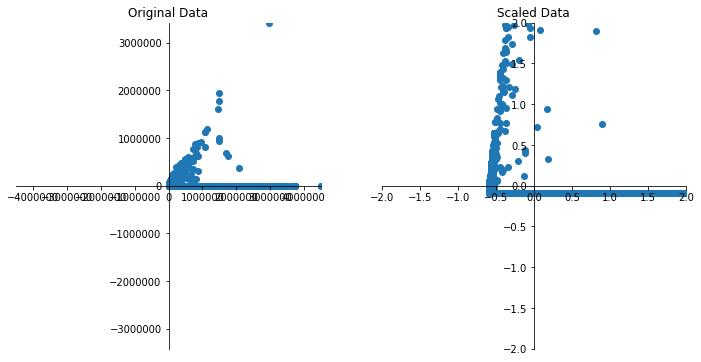

In [10]:
plt.show()

In [12]:
X = pd.get_dummies(ill[["GrossApproval", "SBAGuarantee", "LoanStatus"]])
y = ill["COAmount"].values.reshape(-1, 1)
X.head()

GrossApproval  SBAGuarantee  LoanStatus_CHGOFF  LoanStatus_COMMIT  \
0        1730000       1297500                  0                  0   
1         176600         88300                  0                  0   
2          30500         15250                  1                  0   
3         800000        600000                  1                  0   
4         505000        378750                  0                  0   

   LoanStatus_EXEMPT  LoanStatus_PIF  
0                  1               0  
1                  0               1  
2                  0               0  
3                  0               0  
4                  0               1

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

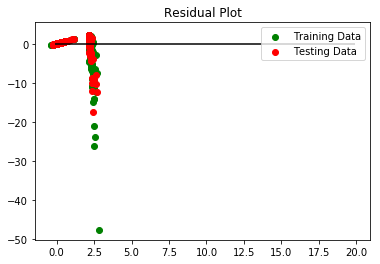

In [15]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5412227705935908, R2: 0.30673840730638524
